* 마이캠퍼스 한대희 , daehee@mycampus.io, 010-2101-0255
* 데이터분석/인공지능을 위한 딥러닝 스쿨 --> http://bit.ly/2TXlJJ4

In [0]:
import collections
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.set()


In [0]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]] #2,3번 칼럼만 이용하자
Y = iris.target

In [3]:
NUM = 100
select = np.random.permutation(150)
Xtr, Ytr = X[select[:NUM]], Y[select[:NUM]]
Xte, Yte = X[select[NUM:]], Y[select[NUM:]]
print(Xtr.shape)
print(Xte.shape)

(100, 2)
(50, 2)


# k-Means Clustering 직접 구현.
나의 대장을 찾아라 !!

In [0]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a - b) # default norm: norm 2
  
def dist_many(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax) # default norm: norm 2


## k-Means Clustering 직접 구현 - 어렵지 않아요 :)  
class MyKmeans(object):
  def __init__(self):
    
    pass
  
  def fit(self, X, k):
    self.X = X.copy()
    self.dim = X.shape[1]
    self.K = k # Number of clusters
    self.N = X.shape[0] # 데이터 개수
    # Cluster Lables(0, 1, 2) - 우리가 계산하고자 하는 목표 대상 Y
    self.Y = np.zeros(self.N) # 처음에는 모두 0으로 세팅
    self.historyY = [] # Y의 변화 이력 저장용
    
    self.max = np.max(X, axis=0)
    self.min = np.min(X, axis=0)
    self.range = self.max - self.min
    
    # Centeroid(대장)의 위치를 랜덤값으로 초기 설정하여 출발 !!
    self.historyC = [] # C의 변화 이력 저장용
    self.C = np.random.random((self.K, self.dim))
    self.C = self.C * self.range
    print('초기 랜덤 Center', self.C)
      
    
    # Centeroid(대장)의 예전 위치 저장. 새 위치와 비교하기 위해.
    C_old = np.zeros(self.C.shape)
    
    # 기존 Centroid와 새 Centroid의 위치 차이(거리)
    diff = dist(self.C, C_old)
    #print('diff', diff)
    
    loopcnt = 0
    # Centroid의 변화가 별로 없으면 멈춤.
    while np.sum(diff) > 0.01:
        self.historyC.append(self.C.copy())
        loopcnt += 1
        # 각 데이터에 대해 자신과 가장 가까운 Centeroid(대장)를 찾아서 그 대장에 소속 시킨다.
        for i in range(self.N):
            distance_to_bosses = dist_many(X[i], self.C) # 대장와 나와의 거리
            who_is_my_boss = np.argmin(distance_to_bosses) # 나와 가장 가까운 centeroid를 찾기
            self.Y[i] = who_is_my_boss
        self.historyY.append(self.Y.copy())
        # Storing the old centroid values
        C_old = self.C.copy()
        # Finding the new centroids by taking the average value
        for c in range(k):
            points = [X[j] for j in range(self.N) if self.Y[j] == c]
            if len(points) > 0:
              self.C[c] = np.mean(points, axis=0)
            else:
              self.C[c] = np.zeros(self.C.shape[1])
        diff = dist_many(self.C, C_old)
        #print('diff', diff)
    print('Loop',  loopcnt)
    return self.C, self.Y
 



### k-means 시각화

In [0]:
###
def draw_kmeans(X, Y, C, K):
  N = X.shape[0]
  colors = ['r', 'g', 'b', 'y', 'c', 'm']
  fig, ax = plt.subplots()
  for c in range(K):
    points = np.array([X[j] for j in range(N) if Y[j] == c])
    ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[c])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')     

In [22]:
kmeans = MyKmeans()
centers, Y = kmeans.fit(X, 3)
print('Centers', centers)
print('Y. Label', Y)

초기 랜덤 Center [[2.09529248 1.79821254]
 [5.14907085 0.89061637]
 [2.60360256 2.18051198]]
Loop 8
Centers [[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
Y. Label [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


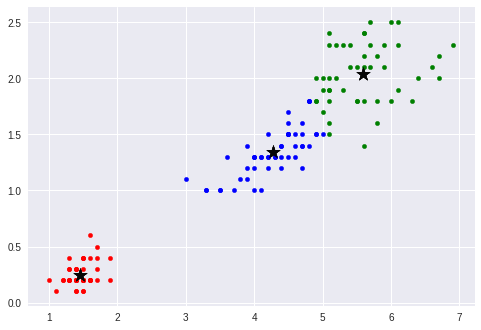

In [23]:
draw_kmeans(X, kmeans.Y, kmeans.C, kmeans.K)

# scikit-learn k-Means 클러스터링

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [28]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

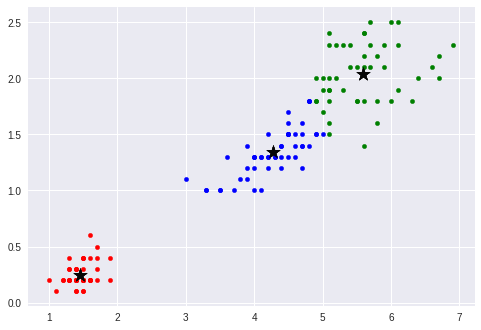

In [31]:
draw_kmeans(X, kmeans.labels_, kmeans.cluster_centers_, kmeans.n_clusters)